# Logistic regression

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Initialazing variables
data = pd.read_csv('data2.txt',header=None)
data = data.to_numpy()
m = data.shape[0]
x1 = data[:,0].reshape((m, 1))/100
x2 = data[:,1].reshape((m, 1))/100
x = np.hstack((np.ones(x1.shape),x1,x2 ))
y = data[:,2].reshape((m, 1))
theta = np.random.rand(3,1).reshape(3,1)
alpha = 0.15
itterations = 2000
error_history = np.zeros((itterations)).reshape(itterations,1)
x1_admitted = x1[x1!=x1-y]
x2_admitted = x2[x2!=x2-y]
x1_not_admitted = x1[x1==x1-y]
x2_not_admitted = x2[x2==x2-y]

In [359]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))   
    sig = np.minimum(sig, 0.999999999999)  
    sig = np.maximum(sig, 0.000000000001)  
    return sig

def error(theta):
    return -1/m * np.sum(np.multiply(y,np.log(sigmoid(x.dot(theta)))) + (1-y)*np.log(1-sigmoid(x.dot(theta))))

def gradient(theta):
    return 1/m * x.T.dot((sigmoid(x.dot(theta))-y))

def gradientDescent(alpha,itterations,theta):
    for i in range(itterations):
        error_history[i] = error(theta)
        theta = theta - alpha*gradient(theta)
    return theta,error_history


def predict(x,y,theta):
    probability = sigmoid(x.dot(theta))
    return np.round(probability)

# Plot data

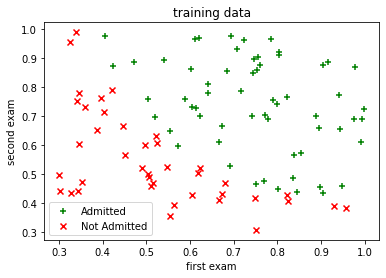

In [360]:
plt.scatter(x1_add,x2_add,label='Admitted',marker="+",color='g')
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.title('training data')
plt.scatter(x1_not_add,x2_not_add,label='Not Admitted',marker="x",color='r')
plt.legend()

# Solution

In [361]:
optimum, error_history = gradientDescent(alpha,itterations,theta)
error_optimum = error(optimum)
print('\u03B80=', optimum[0], ',\u03B81=',optimum[1],'\u03B82=', optimum[2],'\nJ(\u03B8)=',error_optimum)

θ0= [-5.77174226] ,θ1= [5.15625972] θ2= [4.53461724] 
J(θ)= 0.3585231847848588


# Plot of the cost function according to number of itterations

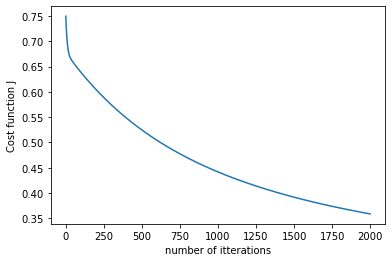

In [362]:
plt.plot(error_history)
plt.xlabel('number of itterations')
plt.ylabel('Cost function J')
plt.show()

# Plot the decision boundary

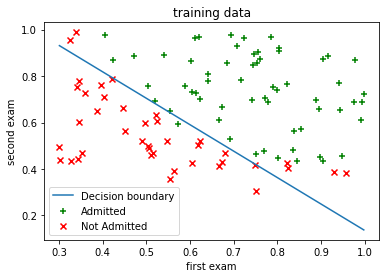

In [363]:
plot_x = np.array([np.min(x[:,1]),  np.max(x[:,1])])
plot_y = 1/optimum[2] * (-optimum[0]-optimum[1]*plot_x)
plt.plot(plot_x,plot_y,label='Decision boundary')
plt.scatter(x1[x1!=x1-y],x2[x2!=x2-y],label='Admitted',marker="+",color='g')
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.title('training data')
plt.scatter(x1[x1==x1-y],x2[x2==x2-y],label='Not Admitted',marker='x',color='r')
plt.legend()

# Accuracy

In [364]:
predictions = predict(x,y,optimum)
print('Accuracy of your model is ',np.sum(predictions==y)/len(y)*100,'%')

Accuracy of your model is  93.0 %


# Confusion matrix 

In [365]:
all = np.hstack((x1,x2,y,predictions))
c = np.zeros((2,2))
c[0,0] = sum( (all[:,2]==all[:,3])[all[:,3]==0]) 
c[1,1] = sum( (all[:,2]==all[:,3])[all[:,3]==1])
c[0,1] = sum( (all[:,2]!=all[:,3])[all[:,2]==0])
c[1,0] = sum( (all[:,2]!=all[:,3])[all[:,2]==1])
print(c)

[[34.  6.]
 [ 1. 59.]]


# Now let's use Sikit learn library

In [366]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
x1 = data[:,0].reshape((m, 1))
x2 = data[:,1].reshape((m, 1))
x_train = np.hstack((x1,x2))
y = y.ravel()
logisticRegr.fit(x_train, y)
intercept = logisticRegr.intercept_
coefs = logisticRegr.coef_
sklearn_optimum = np.vstack((intercept,coefs.reshape(2,1)))

In [367]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predictions)
print(cm)

[[34  6]
 [ 1 59]]


# ROC curve

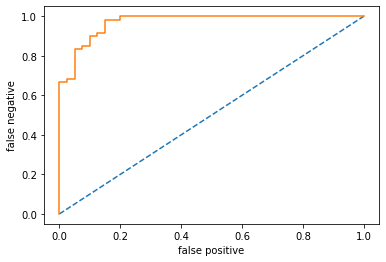

In [368]:
from sklearn.metrics import roc_curve
X = x
y_pred_proba= sigmoid(X.dot(optimum))
fpr,tpr,thresholds=roc_curve(y,y_pred_proba)
plt.plot([0, 1],[0, 1],'--')
plt.plot(fpr,tpr,label='linear regression')
plt.xlabel('false positive')
plt.ylabel('false negative')
plt.show()

# Plot the decision boundary

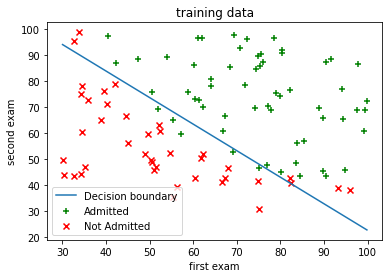

In [369]:
plot_x = np.array([np.min(x[:,1]),  np.max(x[:,1])])*100
plot_y = 1/sklearn_optimum[2] * (-sklearn_optimum[0]-sklearn_optimum[1]*plot_x)
plt.plot(plot_x,plot_y,label='Decision boundary')
plt.scatter(x1_add*100,x2_add*100,label='Admitted',marker="+",color='g')
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.title('training data')
plt.scatter(x1_not_add*100,x2_not_add*100,label='Not Admitted',marker="x",color='r')
plt.legend()

In [370]:
X_test = np.hstack((x1,x2))
R_test=logisticRegr.score(X_test,y)*100
print('Accuracy of your model is ',R_test,'%')

Accuracy of your model is  89.0 %
